In [147]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

In [148]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

In [149]:
def warpImages(img1, img2, H):
  rows1, cols1 = img1.shape[:2]
  rows2, cols2 = img2.shape[:2]

  list_of_points_1 = np.float32([[0,0], [0, rows1],[cols1, rows1], [cols1, 0]]).reshape(-1, 1, 2)
  temp_points = np.float32([[0,0], [0,rows2], [cols2,rows2], [cols2,0]]).reshape(-1,1,2)

  # When we have established a homography we need to warp perspective
  # Change field of view
  list_of_points_2 = cv.perspectiveTransform(temp_points, H)

  list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

  [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
  [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

  translation_dist = [-x_min, -y_min]

  H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

  output_img = cv.warpPerspective( img2, H_translation.dot(H), (x_max-x_min, y_max-y_min) )
  output_img[translation_dist[1]:rows1+translation_dist[1], translation_dist[0]:cols1+translation_dist[0]] = img1

  return output_img

In [150]:
def stitch_images(img1, img2, ratio_thresh, t):
    sift = cv.SIFT_create() #cv.ORB_create(nfeatures=5000)
    bf = cv.BFMatcher(cv.NORM_L2, crossCheck=False) #cv.BFMatcher(cv.NORM_HAMMING, crossCheck=False)

    keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    good = []
    for m, n in matches:
        if m.distance < ratio_thresh * n.distance:
            good.append(m)

    MIN_MATCH_COUNT = 10
    if len(good) > MIN_MATCH_COUNT:
        src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
        M, _ = cv.findHomography(src_pts, dst_pts, cv.RANSAC, t)
        result = warpImages(img2, img1, M)

    return result  

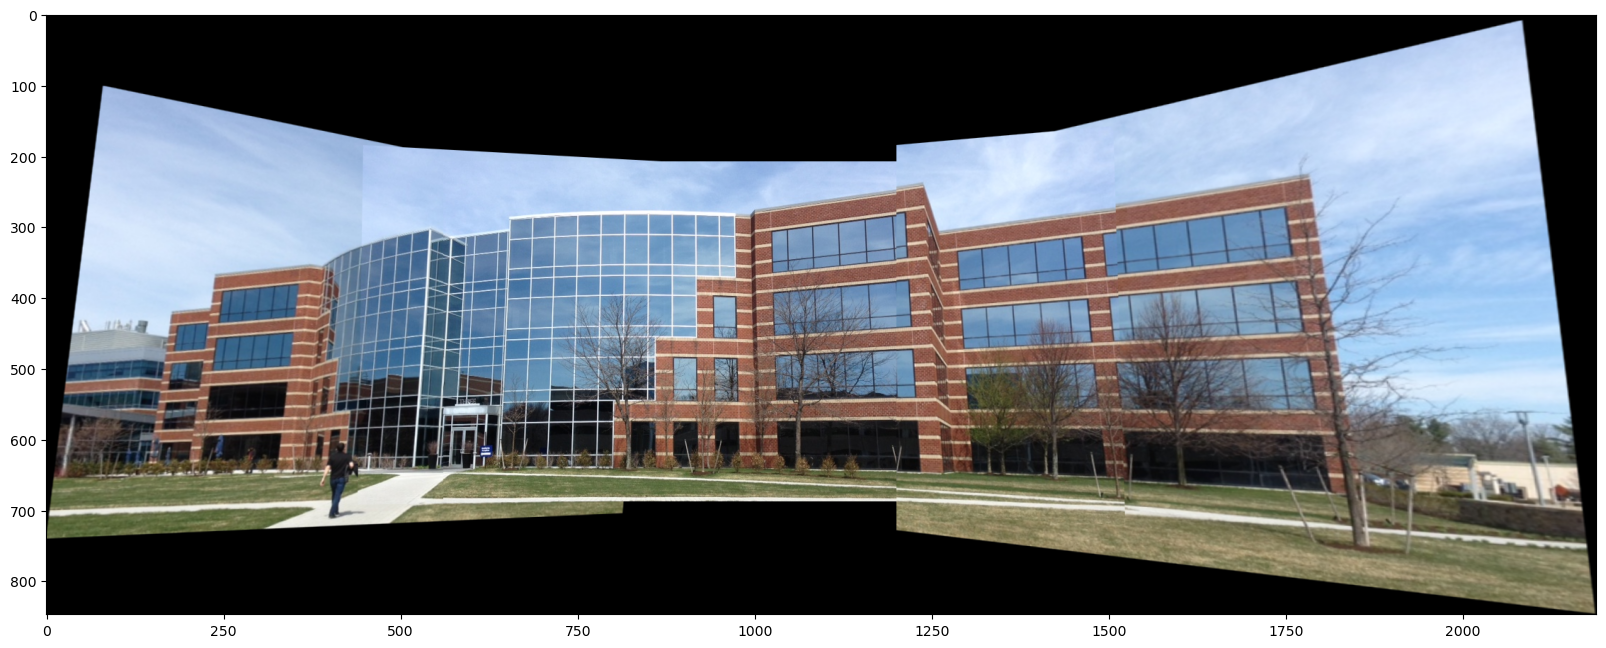

In [151]:
folder_path = "D:/xuexi/CV/lab3/building1"
images = load_images_from_folder(folder_path)

stitched_image1 = stitch_images(images[0], images[1], 0.6, 5.0)
stitched_image2 = stitch_images(stitched_image1, images[2], 0.6, 5.0)
stitched_image3 = stitch_images(images[4], images[3], 0.6, 5.0)
final_image = stitch_images(stitched_image3, stitched_image2, 0.6, 5.0)

plt.figure(figsize=(20, 50))
plt.imshow(cv.cvtColor(final_image, cv.COLOR_BGR2RGB))
plt.show()

Using ORB or SIFT can only splice the 3 middle images of building2 with minimal distortion

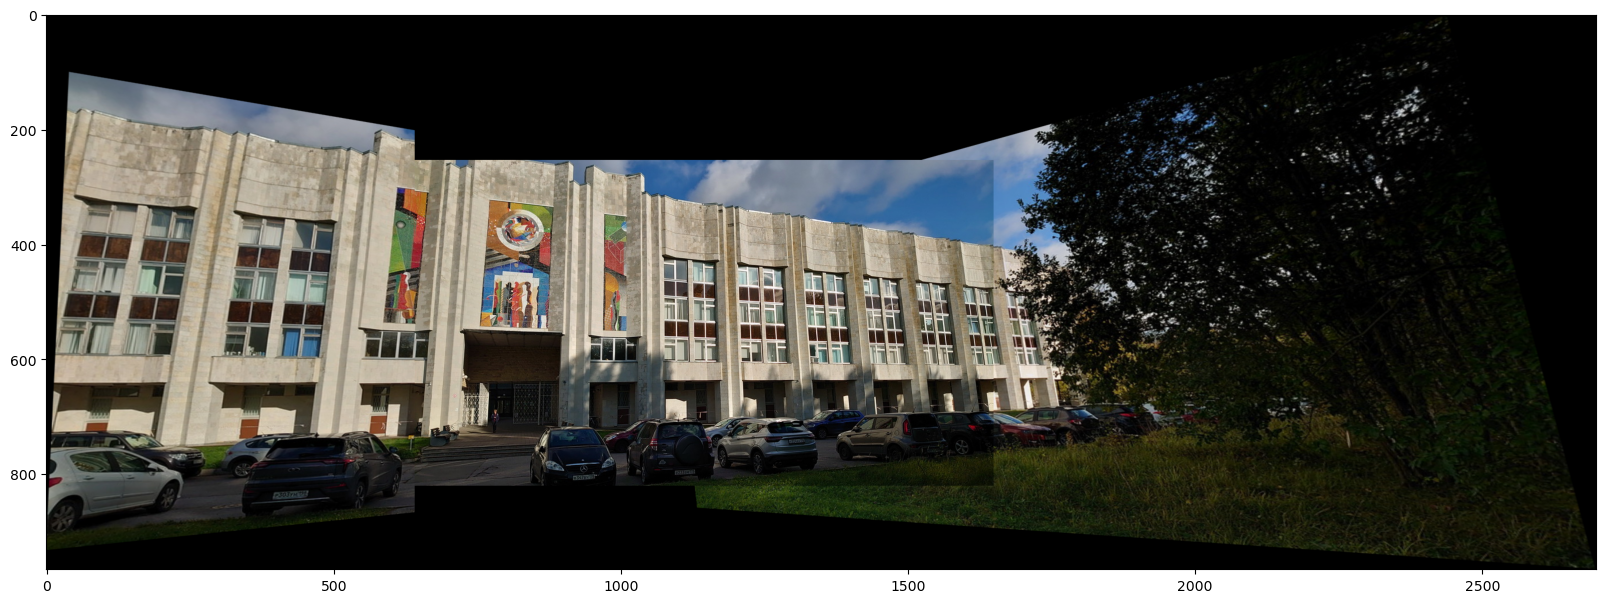

In [152]:
folder_path = "D:/xuexi/CV/lab3/building2"
images = load_images_from_folder(folder_path)

stitched_image1 = stitch_images(images[0], images[1], 0.6, 5.0)
stitched_image2 = stitch_images(images[2], stitched_image1, 0.6, 5.0)

plt.figure(figsize=(20, 50))
plt.imshow(cv.cvtColor(stitched_image2, cv.COLOR_BGR2RGB))
plt.show()

Use Stitcher to stitch panoramic pictures for building2 more perfectly

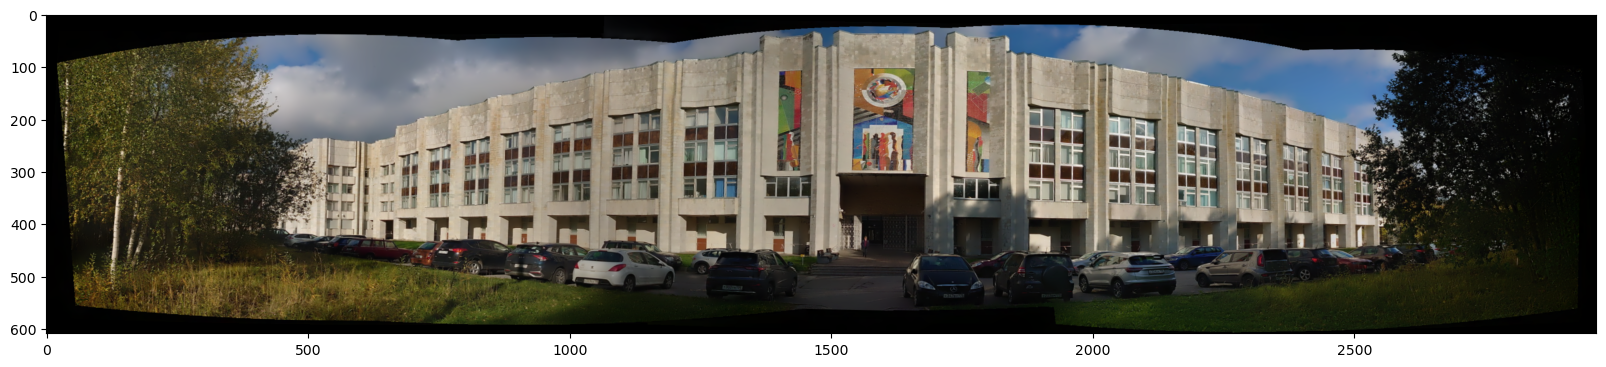

In [163]:
folder_path = "D:/xuexi/CV/lab3/building2"
images = load_images_from_folder(folder_path)

images_group1 = images[:3]  
images_group2 = images[2:]  

stitcher = cv.Stitcher_create()
status1, pano_group1 = stitcher.stitch(images_group1)
status2, pano_group2 = stitcher.stitch(images_group2)
status_final, pano_final = stitcher.stitch([pano_group1, pano_group2])

plt.figure(figsize=(20, 50))
plt.imshow(cv.cvtColor(pano_final, cv.COLOR_BGR2RGB))
plt.show()

Using ORB or SIFT can only splice the 5 middle images of building3 with minimal distortion

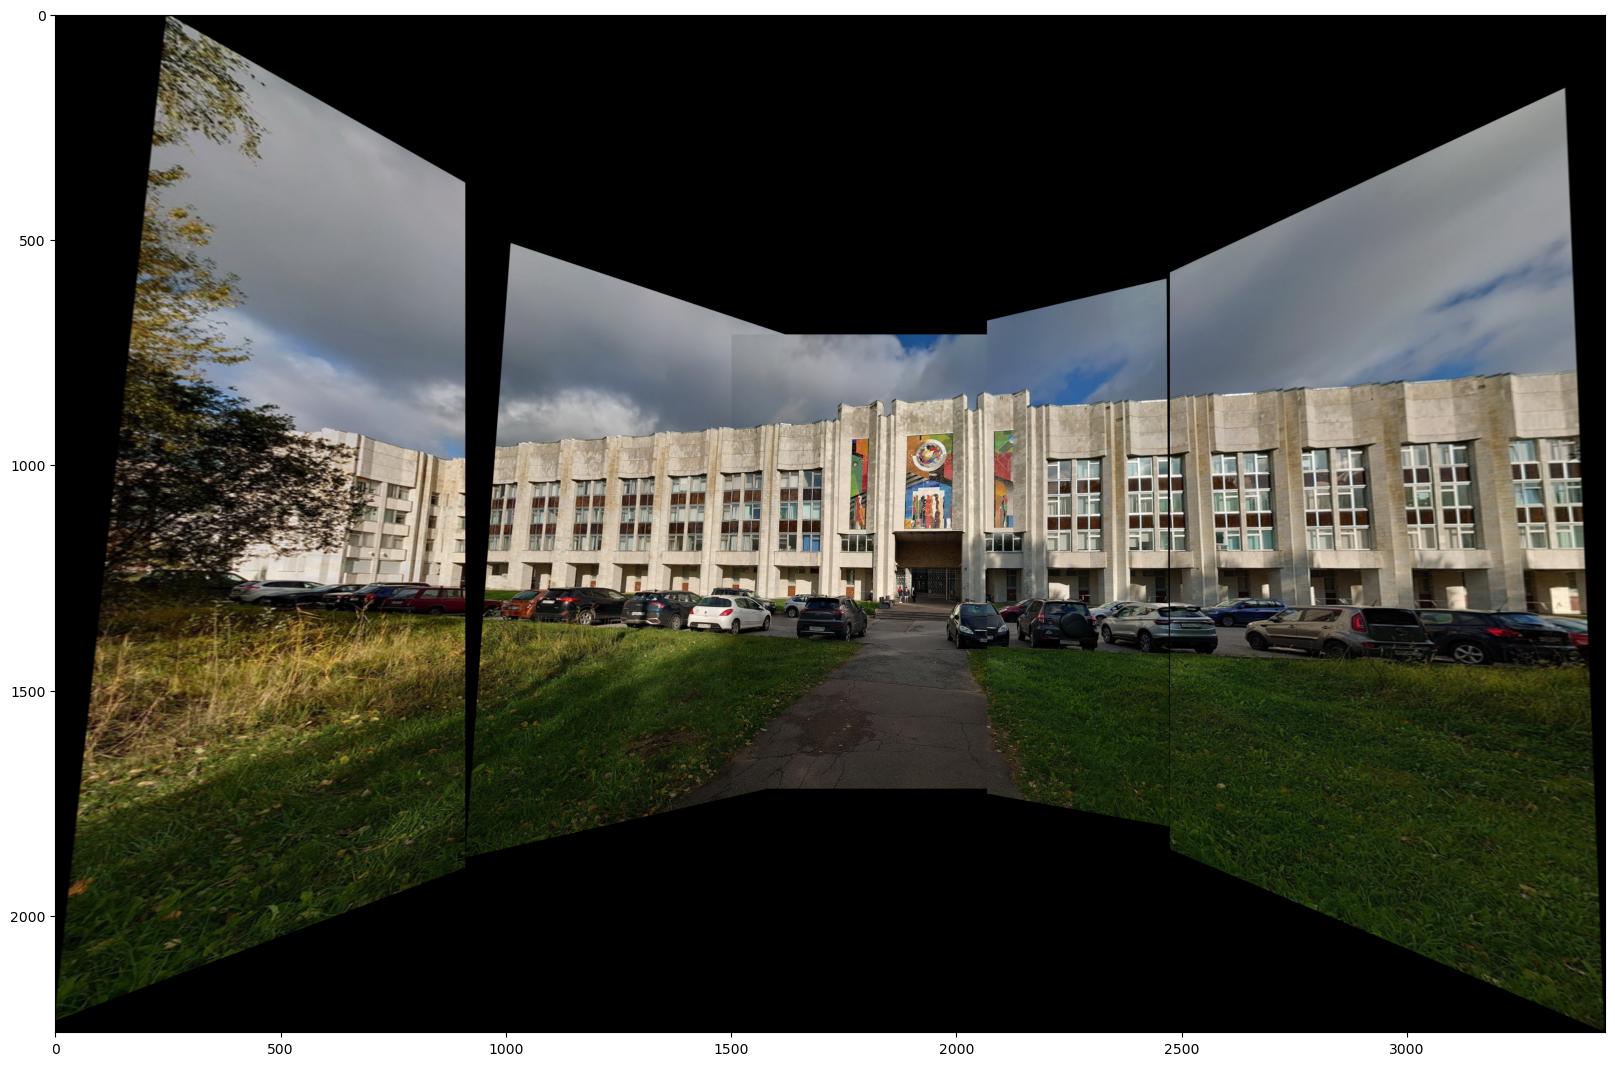

In [154]:
folder_path = "D:/xuexi/CV/lab3/building3"
images = load_images_from_folder(folder_path)

stitched_image1 = stitch_images(images[4], images[3], 0.6, 5.0)
stitched_image2 = stitch_images(images[2], stitched_image1, 0.6, 5.0)
stitched_image3 = stitch_images(images[1], stitched_image2, 0.6, 5.0)
stitched_image4 = stitch_images(images[5], stitched_image3, 0.6, 5.0)

plt.figure(figsize=(20, 50))
plt.imshow(cv.cvtColor(stitched_image4, cv.COLOR_BGR2RGB))
plt.show()


Use Stitcher to stitch panoramic pictures for building3 more perfectly

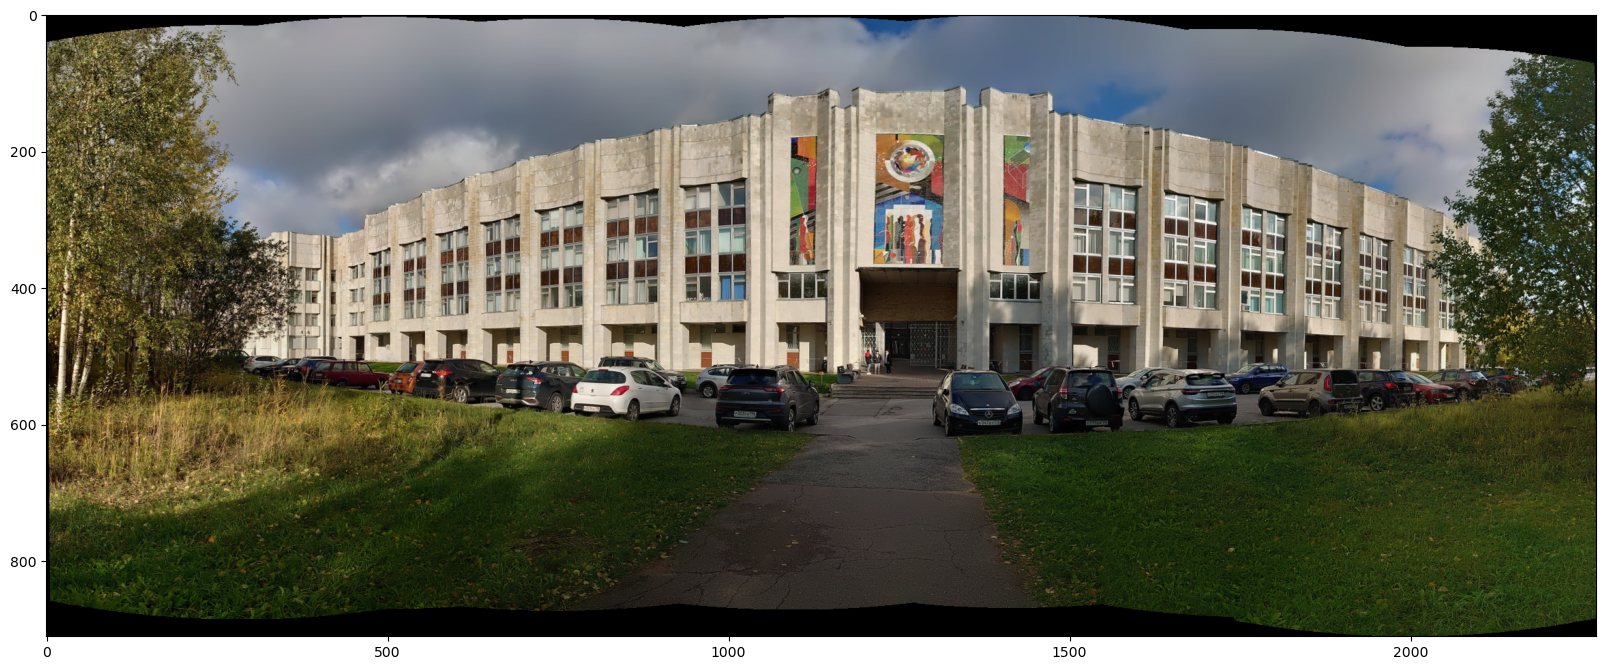

In [155]:
folder_path = "D:/xuexi/CV/lab3/building3"
images = load_images_from_folder(folder_path)

stitcher = cv.Stitcher_create()
status, pano = stitcher.stitch(images)

plt.figure(figsize=(20, 50))
plt.imshow(cv.cvtColor(pano, cv.COLOR_BGR2RGB))
plt.show()